## Klasterisasi Data Iris menggunakan Metode K-Means

### 1. Akuisisi data

In [3]:
# Warning
import warnings
warnings.filterwarnings("ignore")

# Main Library
import pandas as pd 
import numpy as np
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer
import seaborn as sns

# Library for Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Unsupervised Learning
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [4]:
dataset = pd.read_csv("../Dataset/dataset_iris.csv")
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2. Praproses Data

In [6]:
x = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = dataset["species"]

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)

In [8]:
scaled = np.round(scaled, 5)
scaled

array([[0.22222, 0.625  , 0.0678 , 0.04167],
       [0.16667, 0.41667, 0.0678 , 0.04167],
       [0.11111, 0.5    , 0.05085, 0.04167],
       [0.08333, 0.45833, 0.08475, 0.04167],
       [0.19444, 0.66667, 0.0678 , 0.04167],
       [0.30556, 0.79167, 0.11864, 0.125  ],
       [0.08333, 0.58333, 0.0678 , 0.08333],
       [0.19444, 0.58333, 0.08475, 0.04167],
       [0.02778, 0.375  , 0.0678 , 0.04167],
       [0.16667, 0.45833, 0.08475, 0.     ],
       [0.30556, 0.70833, 0.08475, 0.04167],
       [0.13889, 0.58333, 0.10169, 0.04167],
       [0.13889, 0.41667, 0.0678 , 0.     ],
       [0.     , 0.41667, 0.01695, 0.     ],
       [0.41667, 0.83333, 0.0339 , 0.04167],
       [0.38889, 1.     , 0.08475, 0.125  ],
       [0.30556, 0.79167, 0.05085, 0.125  ],
       [0.22222, 0.625  , 0.0678 , 0.08333],
       [0.38889, 0.75   , 0.11864, 0.08333],
       [0.22222, 0.75   , 0.08475, 0.08333],
       [0.30556, 0.58333, 0.11864, 0.04167],
       [0.22222, 0.70833, 0.08475, 0.125  ],
       [0.

In [9]:
df1 = pd.DataFrame(data=scaled, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df2 = pd.DataFrame(data=y, columns=["species"])

In [10]:
df_normalize = pd.concat([df1, df2], axis=1)
df_normalize

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.22222,0.62500,0.06780,0.04167,setosa
1,0.16667,0.41667,0.06780,0.04167,setosa
2,0.11111,0.50000,0.05085,0.04167,setosa
3,0.08333,0.45833,0.08475,0.04167,setosa
4,0.19444,0.66667,0.06780,0.04167,setosa
...,...,...,...,...,...
145,0.66667,0.41667,0.71186,0.91667,virginica
146,0.55556,0.20833,0.67797,0.75000,virginica
147,0.61111,0.41667,0.71186,0.79167,virginica
148,0.52778,0.58333,0.74576,0.91667,virginica


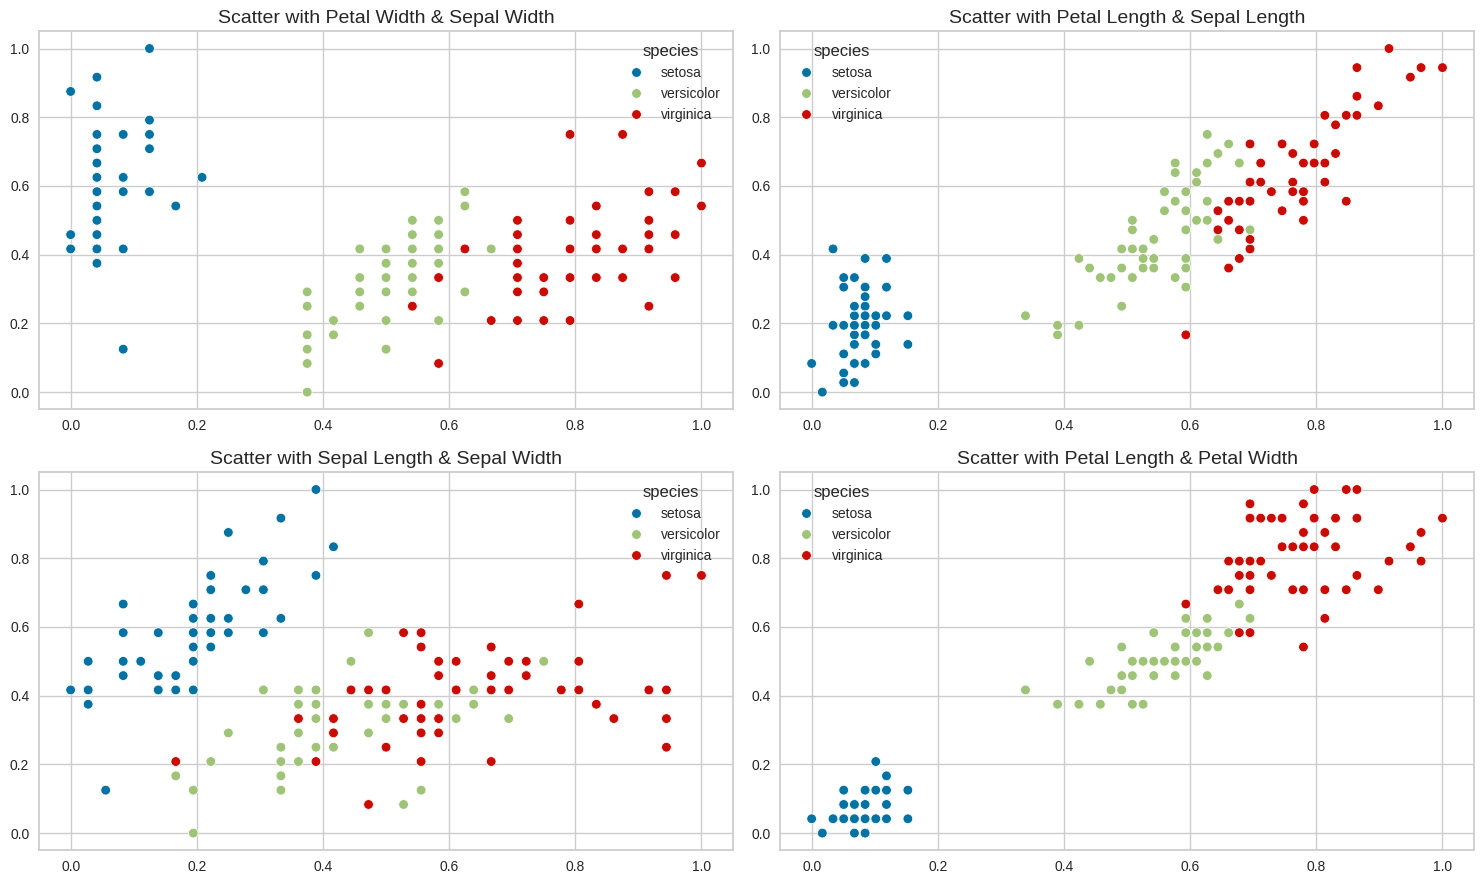

In [11]:
import matplotlib.pyplot as plt
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
ax1, ax2, ax3, ax4 = axes.flatten()


sns.scatterplot(data=df_normalize, x="petal_width", y="sepal_width", hue="species", ax=ax1)
ax1.set_title("Scatter with Petal Width & Sepal Width", fontsize=14)
ax1.set_xlabel("", fontsize=12)
ax1.set_ylabel("", fontsize=12)
ax1.grid(True)

sns.scatterplot(data=df_normalize, x="petal_length", y="sepal_length", hue="species", ax=ax2)
ax2.set_title("Scatter with Petal Length & Sepal Length", fontsize=14)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("", fontsize=12)
ax2.grid(True)

sns.scatterplot(data=df_normalize, x="sepal_length", y="sepal_width", hue="species", ax=ax3)
ax3.set_title("Scatter with Sepal Length & Sepal Width", fontsize=14)
ax3.set_xlabel("", fontsize=12)
ax3.set_ylabel("", fontsize=12)
ax3.grid(True)

sns.scatterplot(data=df_normalize, x="petal_length", y="petal_width", hue="species", ax=ax4)
ax4.set_title("Scatter with Petal Length & Petal Width", fontsize=14)
ax4.set_xlabel("", fontsize=12)
ax4.set_ylabel("", fontsize=12)
ax4.grid(True)

plt.tight_layout()
plt.show()

### 3. K-Means Algorithm

In [12]:
# Menentukan range untuk jumlah klaster
range_n_clusters = range(1, 11)
inertia = []

# Menggunakan Metode Elbow unntuk menemukan jumlah klaster optimal
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

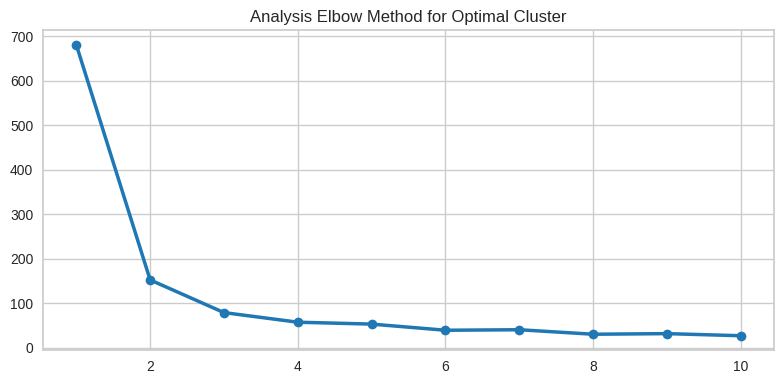

In [13]:
# Define Boxplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range_n_clusters, inertia, color="tab:blue", linewidth=2.5, marker="o")

# Set Labels
ax.set_title('Analysis Elbow Method for Optimal Cluster')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# Show Boxplot
plt.tight_layout()
plt.show()

In [14]:
# Menentukan jumlah klaster optimal dari hasil Elbow
optimal_clusters = 3

# Menerapkan KMeans dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled)
y_kmeans = kmeans.predict(scaled)

In [15]:
scaled[:,2]

array([0.0678 , 0.0678 , 0.05085, 0.08475, 0.0678 , 0.11864, 0.0678 ,
       0.08475, 0.0678 , 0.08475, 0.08475, 0.10169, 0.0678 , 0.01695,
       0.0339 , 0.08475, 0.05085, 0.0678 , 0.11864, 0.08475, 0.11864,
       0.08475, 0.     , 0.11864, 0.15254, 0.10169, 0.10169, 0.08475,
       0.0678 , 0.10169, 0.10169, 0.08475, 0.08475, 0.0678 , 0.08475,
       0.0339 , 0.05085, 0.08475, 0.05085, 0.08475, 0.05085, 0.05085,
       0.05085, 0.10169, 0.15254, 0.0678 , 0.10169, 0.0678 , 0.08475,
       0.0678 , 0.62712, 0.59322, 0.66102, 0.50847, 0.61017, 0.59322,
       0.62712, 0.38983, 0.61017, 0.49153, 0.42373, 0.54237, 0.50847,
       0.62712, 0.44068, 0.57627, 0.59322, 0.52542, 0.59322, 0.49153,
       0.64407, 0.50847, 0.66102, 0.62712, 0.55932, 0.57627, 0.64407,
       0.67797, 0.59322, 0.42373, 0.47458, 0.45763, 0.49153, 0.69492,
       0.59322, 0.59322, 0.62712, 0.57627, 0.52542, 0.50847, 0.57627,
       0.61017, 0.50847, 0.38983, 0.54237, 0.54237, 0.54237, 0.55932,
       0.33898, 0.52

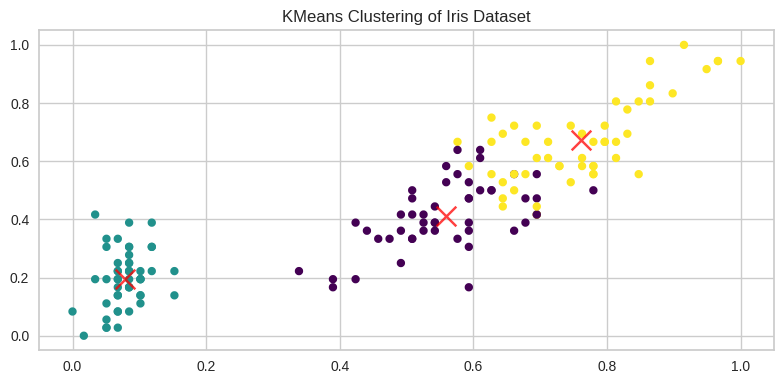

In [16]:
# Centroid KMeans
centers = kmeans.cluster_centers_

# Define Boxplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(scaled[:, 2], scaled[:, 0], c=y_kmeans, cmap='viridis', marker='.', linewidths=2.5)
plt.scatter(centers[:, 2], centers[:, 0], c='red', s=200, alpha=0.75, marker='x')

# Set Labels
ax.set_title('KMeans Clustering of Iris Dataset')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# Show Boxplot
plt.tight_layout()
plt.show()

### Akhirnya Done Klastering :D

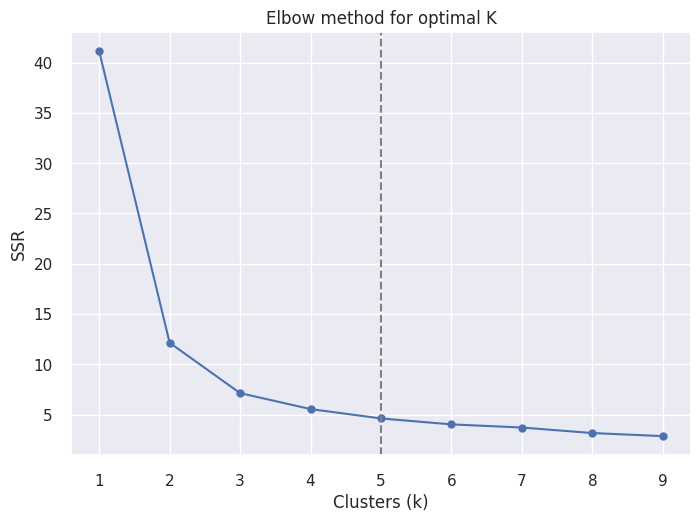

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ks = range(1, 10)

ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k)

    # fit the model
    model.fit(scaled)

    # append the inertial to a list
    ssr.append(model.inertia_)
    
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()

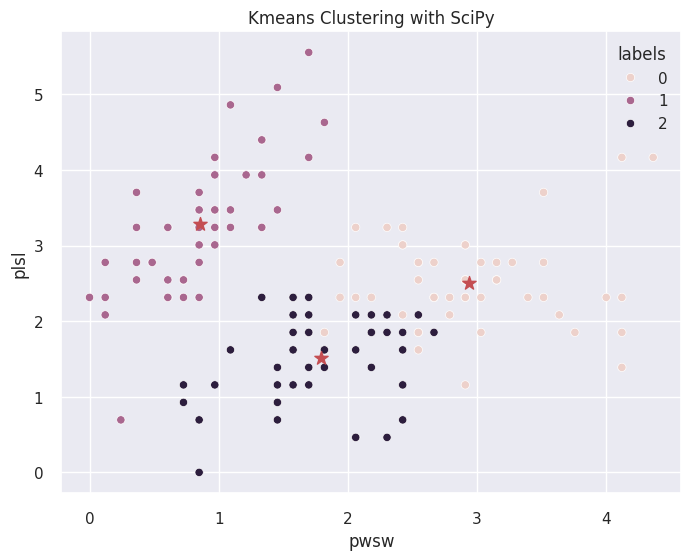

In [18]:
import matplotlib.pyplot as plt
from numpy import vstack,array
from numpy.random import rand
import pandas as pd
import seaborn as sns
 
from scipy.cluster.vq import kmeans,vq,whiten
 
# Generate data
data = vstack((
    (rand(30,2)+1),(rand(30,2)+2.5),(rand(30,2)+4)
    ))

# standardize the features
data = whiten(scaled)
 
# Run KMeans  with 3 clusters
centroids, _ = kmeans(data, 3) 

# Predict labels
labels, _ = vq(data, centroids)

# Create DataFrame
df = pd.DataFrame(data, columns=["pwsw", "plsl", "slsw", "plpw"])
df['labels'] = labels

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pwsw',
    y='plsl',
    hue='labels',
    data=df
)

# Plot cluster centers
cs_x = centroids[:,0]
cs_y = centroids[:,1]
plt.scatter(cs_x, cs_y, marker='*', s=100, c='r')

plt.title('Kmeans Clustering with SciPy')
plt.show()


The purity score is 38.0%


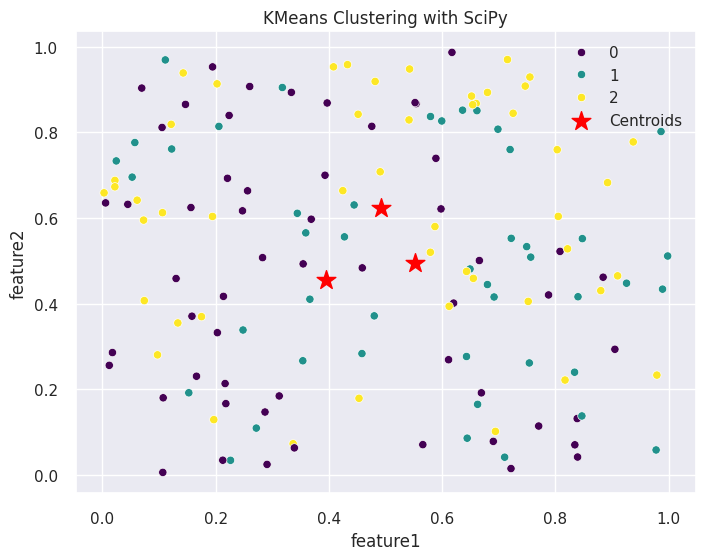

In [19]:
import numpy as np
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

# Contoh data - pastikan data ini sesuai dengan yang Anda miliki
# Misalkan `scaled` adalah data yang telah distandarisasi
# y adalah label asli (misalnya spesies iris) dan labels adalah hasil dari KMeans

# Pastikan data yang digunakan memiliki panjang yang sama
scaled = np.random.rand(150, 4)  # Contoh data standar dengan 150 sampel dan 4 fitur
y = np.random.randint(0, 3, size=150)  # Label asli untuk contoh
labels = np.random.randint(0, 3, size=150)  # Label hasil clustering (KMeans)

# Purity Score Function
def purity_score(y_true, y_pred):
    # Compute contingency matrix (also called confusion matrix)
    cm = contingency_matrix(y_true, y_pred)
    
    # Return purity score
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

# Calculate Purity
purity = purity_score(y, labels)
print(f"The purity score is {round(purity * 100, 2)}%")

# KMeans Clustering
centroids, _ = kmeans(scaled, 3)
labels, _ = vq(scaled, centroids)

# Create DataFrame for Plotting
df = pd.DataFrame(scaled, columns=['feature1', 'feature2', 'feature3', 'feature4'])
df['labels'] = labels

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature1', y='feature2', hue='labels', data=df, palette="viridis")

# Plot Centroids
cs_x = centroids[:, 0]
cs_y = centroids[:, 1]
plt.scatter(cs_x, cs_y, marker='*', s=200, c='red', label="Centroids")

plt.title('KMeans Clustering with SciPy')
plt.legend()
plt.show()


In [20]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils import distance_metric
from pyclustering.cluster.encoder import cluster_encoder
from pyclustering.cluster.center_initializer import random_center_initializer  # Menggunakan center_initializer
import numpy as np

# Define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# Function to compute purity score (assumed purity_score function is already defined)
def pyPurity(dist_measure):
    # Initializing random centers for KMeans using center_initializer
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    
    # Create KMeans instance with the specified distance metric
    metric = distance_metric(dist_measure)
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=metric)
    
    # Perform cluster analysis
    instanceKm.process()
    
    # Get cluster results and cluster centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    
    # Encode clusters
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    
    # Return purity score
    return purity_score(y, pyLabels)

# Example data (Replace this with your actual data)
X = np.random.rand(150, 4)  # Example dataset with 150 samples and 4 features
y = np.random.randint(0, 3, size=150)  # Example ground truth labels

# Print purity scores for each distance measure
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value) * 100, 2)}%")


The purity score for euclidean distance is 43.33%
The purity score for squared euclidean distance is 43.33%
The purity score for manhattan distance is 43.33%
The purity score for chebyshev distance is 43.33%
The purity score for canberra distance is 43.33%
The purity score for chi-square distance is 43.33%
